# 🎯 Logistic Regression: Teaching Computers to Make Decisions!

**Welcome, Future Data Scientist!**

In our Linear Regression notebook, we taught computers to predict **numbers** (like test scores or house prices). But what if we want to predict **categories**?

- Will this email be **spam** or **not spam**?
- Will the student **pass** or **fail**?
- Is this tumor **malignant** or **benign**?

This is called **Classification**, and **Logistic Regression** is one of the most important algorithms for it!

---

## 📚 What You'll Learn in This Notebook

1. **Classification vs Regression** - Understanding the difference
2. **The Sigmoid Function** - The magic curve that turns numbers into probabilities
3. **Logistic Regression Model** - How it works
4. **The Cost Function** - Cross-entropy loss
5. **Gradient Descent for Classification** - Learning the best decision boundary
6. **Decision Boundaries** - Visualizing how the model separates classes
7. **Multi-Class Classification** - More than two categories
8. **Evaluation Metrics** - Accuracy, Precision, Recall, and more!

---

## 🎨 Real-World Examples of Classification

- **Medical Diagnosis**: Disease present or not?
- **Email Filtering**: Spam or legitimate?
- **Credit Approval**: Approve loan or deny?
- **Image Recognition**: Cat, dog, or bird?

Let's dive in! 🚀

---

# Part 1: Setting Up Our Workshop 🛠️

Let's import all the tools we'll need for this journey!

In [1]:
# Import our essential tools
import numpy as np                    # For math operations
import pandas as pd                   # For organizing data
import matplotlib.pyplot as plt       # For drawing graphs
from matplotlib.colors import ListedColormap  # For colorful plots
import warnings
warnings.filterwarnings('ignore')     # Keep output clean

# Make our graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All tools are ready! Let's learn about Logistic Regression!")

✅ All tools are ready! Let's learn about Logistic Regression!


---

# Part 2: Classification vs Regression 🔄

## What's the Difference?

| **Regression** | **Classification** |
|----------------|--------------------|
| Predicts **continuous numbers** | Predicts **categories/classes** |
| Example: House price = $350,000 | Example: Email = Spam or Not Spam |
| Output: Any number | Output: Class label (0, 1, 2, ...) |

## Why Can't We Just Use Linear Regression?

Great question! Let's see what happens if we try...

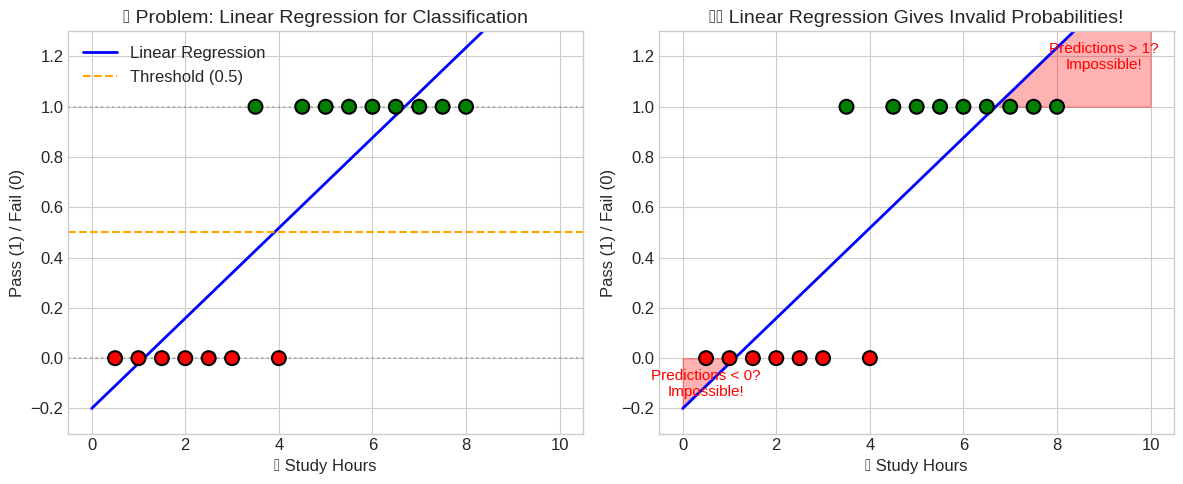


🚫 PROBLEMS WITH LINEAR REGRESSION FOR CLASSIFICATION:
   1. Predictions can be > 1 or < 0 (but probabilities must be 0-1!)
   2. The line doesn't capture the 'switch' from 0 to 1 well
   3. Outliers can drastically affect the line

   We need something better... Enter the SIGMOID FUNCTION! 🎯


In [2]:
# Let's create a simple classification problem:
# Can we predict if a student passes (1) or fails (0) based on study hours?

# Study hours for different students
study_hours = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

# Pass (1) or Fail (0) - notice the pattern: more study = more likely to pass
passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Let's try using Linear Regression (what we learned before)
from sklearn.linear_model import LinearRegression

# Fit linear regression
linear_model = LinearRegression()
linear_model.fit(study_hours.reshape(-1, 1), passed)

# Create predictions
x_line = np.linspace(0, 10, 100)
y_linear = linear_model.predict(x_line.reshape(-1, 1))

# Visualize the problem
plt.figure(figsize=(12, 5))

# Left plot: Linear regression attempt
plt.subplot(1, 2, 1)
plt.scatter(study_hours, passed, s=100, c=['red' if p==0 else 'green' for p in passed],
            edgecolors='black', linewidth=1.5, zorder=5)
plt.plot(x_line, y_linear, 'b-', linewidth=2, label='Linear Regression')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Threshold (0.5)')
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('📚 Study Hours', fontsize=12)
plt.ylabel('Pass (1) / Fail (0)', fontsize=12)
plt.title('❌ Problem: Linear Regression for Classification', fontsize=14)
plt.legend()
plt.ylim(-0.3, 1.3)

# Right plot: Show the problems
plt.subplot(1, 2, 2)
plt.scatter(study_hours, passed, s=100, c=['red' if p==0 else 'green' for p in passed],
            edgecolors='black', linewidth=1.5, zorder=5)
plt.plot(x_line, y_linear, 'b-', linewidth=2)

# Highlight problems
plt.fill_between(x_line, 1, y_linear, where=(y_linear > 1), color='red', alpha=0.3)
plt.fill_between(x_line, y_linear, 0, where=(y_linear < 0), color='red', alpha=0.3)
plt.annotate('Predictions > 1?\nImpossible!', xy=(9, 1.15), fontsize=11,
             ha='center', color='red')
plt.annotate('Predictions < 0?\nImpossible!', xy=(0.5, -0.15), fontsize=11,
             ha='center', color='red')
plt.xlabel('📚 Study Hours', fontsize=12)
plt.ylabel('Pass (1) / Fail (0)', fontsize=12)
plt.title('⚠️ Linear Regression Gives Invalid Probabilities!', fontsize=14)
plt.ylim(-0.3, 1.3)

plt.tight_layout()
plt.savefig('01_linear_vs_classification.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🚫 PROBLEMS WITH LINEAR REGRESSION FOR CLASSIFICATION:")
print("   1. Predictions can be > 1 or < 0 (but probabilities must be 0-1!)")
print("   2. The line doesn't capture the 'switch' from 0 to 1 well")
print("   3. Outliers can drastically affect the line")
print("\n   We need something better... Enter the SIGMOID FUNCTION! 🎯")

---

# Part 3: The Sigmoid Function - The Magic S-Curve! 🪄

## The Key Insight

We need a function that:
1. Always outputs values between **0 and 1** (like probabilities!)
2. Has an **S-shape** that captures the transition between classes
3. Outputs **0.5** when we're unsure (right at the decision boundary)

## The Sigmoid Function

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- **z** = the input (can be any number from -∞ to +∞)
- **e** = Euler's number (≈ 2.718)
- **σ(z)** = the output (always between 0 and 1!)

Let's visualize this beautiful function!

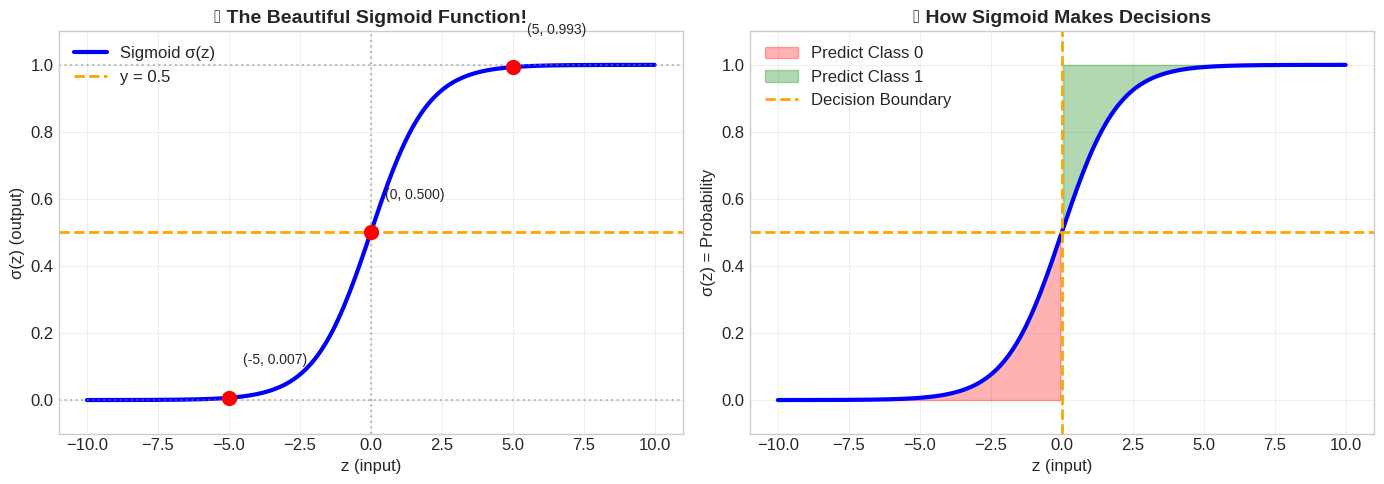


🔑 KEY PROPERTIES OF THE SIGMOID FUNCTION:
   • Output is ALWAYS between 0 and 1 ✓
   • When z = 0: σ(0) = 0.5 (maximum uncertainty)
   • When z is very positive: σ(z) → 1 (confident it's class 1)
   • When z is very negative: σ(z) → 0 (confident it's class 0)

   The S-shape creates a smooth transition between classes!


In [3]:
def sigmoid(z):
    """
    The Sigmoid Function - converts any number to a probability (0 to 1)

    This is the HEART of logistic regression!

    Parameters:
    -----------
    z : input value(s) - can be any real number

    Returns:
    --------
    Output between 0 and 1 (a probability!)
    """
    return 1 / (1 + np.exp(-z))


# Let's visualize the sigmoid function!
z = np.linspace(-10, 10, 200)
sigma_z = sigmoid(z)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: The sigmoid curve
axes[0].plot(z, sigma_z, 'b-', linewidth=3, label='Sigmoid σ(z)')
axes[0].axhline(y=0.5, color='orange', linestyle='--', linewidth=2, label='y = 0.5')
axes[0].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
axes[0].axhline(y=1, color='gray', linestyle=':', alpha=0.5)
axes[0].axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# Mark key points
key_points = [(-5, sigmoid(-5)), (0, 0.5), (5, sigmoid(5))]
for x, y in key_points:
    axes[0].scatter([x], [y], s=100, c='red', zorder=5)
    axes[0].annotate(f'({x}, {y:.3f})', xy=(x, y), xytext=(x+0.5, y+0.1),
                     fontsize=10)

axes[0].set_xlabel('z (input)', fontsize=12)
axes[0].set_ylabel('σ(z) (output)', fontsize=12)
axes[0].set_title('✨ The Beautiful Sigmoid Function!', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].set_ylim(-0.1, 1.1)
axes[0].grid(True, alpha=0.3)

# Right plot: Interpretation
axes[1].plot(z, sigma_z, 'b-', linewidth=3)
axes[1].fill_between(z, 0, sigma_z, where=(sigma_z < 0.5), color='red', alpha=0.3, label='Predict Class 0')
axes[1].fill_between(z, sigma_z, 1, where=(sigma_z >= 0.5), color='green', alpha=0.3, label='Predict Class 1')
axes[1].axhline(y=0.5, color='orange', linestyle='--', linewidth=2, label='Decision Boundary')
axes[1].axvline(x=0, color='orange', linestyle='--', linewidth=2)

axes[1].set_xlabel('z (input)', fontsize=12)
axes[1].set_ylabel('σ(z) = Probability', fontsize=12)
axes[1].set_title('🎯 How Sigmoid Makes Decisions', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left')
axes[1].set_ylim(-0.1, 1.1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_sigmoid_function.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 KEY PROPERTIES OF THE SIGMOID FUNCTION:")
print("   • Output is ALWAYS between 0 and 1 ✓")
print("   • When z = 0: σ(0) = 0.5 (maximum uncertainty)")
print("   • When z is very positive: σ(z) → 1 (confident it's class 1)")
print("   • When z is very negative: σ(z) → 0 (confident it's class 0)")
print("\n   The S-shape creates a smooth transition between classes!")

In [4]:
# Interactive exploration: How different z values map to probabilities

print("🧮 SIGMOID FUNCTION TABLE:")
print("=" * 40)
print(f"{'z (input)':<15} {'σ(z) (probability)':<20} {'Interpretation'}")
print("-" * 60)

test_values = [-10, -5, -2, -1, 0, 1, 2, 5, 10]
for z_val in test_values:
    prob = sigmoid(z_val)
    if prob < 0.3:
        interp = "Very likely Class 0 🔴"
    elif prob < 0.5:
        interp = "Probably Class 0 🟠"
    elif prob == 0.5:
        interp = "50/50 - Uncertain 🟡"
    elif prob < 0.7:
        interp = "Probably Class 1 🟢"
    else:
        interp = "Very likely Class 1 🟢"
    print(f"{z_val:<15} {prob:<20.6f} {interp}")

🧮 SIGMOID FUNCTION TABLE:
z (input)       σ(z) (probability)   Interpretation
------------------------------------------------------------
-10             0.000045             Very likely Class 0 🔴
-5              0.006693             Very likely Class 0 🔴
-2              0.119203             Very likely Class 0 🔴
-1              0.268941             Very likely Class 0 🔴
0               0.500000             50/50 - Uncertain 🟡
1               0.731059             Very likely Class 1 🟢
2               0.880797             Very likely Class 1 🟢
5               0.993307             Very likely Class 1 🟢
10              0.999955             Very likely Class 1 🟢


---

# Part 4: The Logistic Regression Model 🧠

## Putting It Together

Remember our linear equation from Linear Regression?

$$z = w \cdot x + b$$

In Logistic Regression, we pass this through the sigmoid function:

$$P(y=1|x) = \sigma(w \cdot x + b) = \frac{1}{1 + e^{-(wx + b)}}$$

This gives us the **probability** that the input belongs to class 1!

## How to Make a Decision

If the probability ≥ 0.5, predict **Class 1** (yes/pass/positive)  
If the probability < 0.5, predict **Class 0** (no/fail/negative)

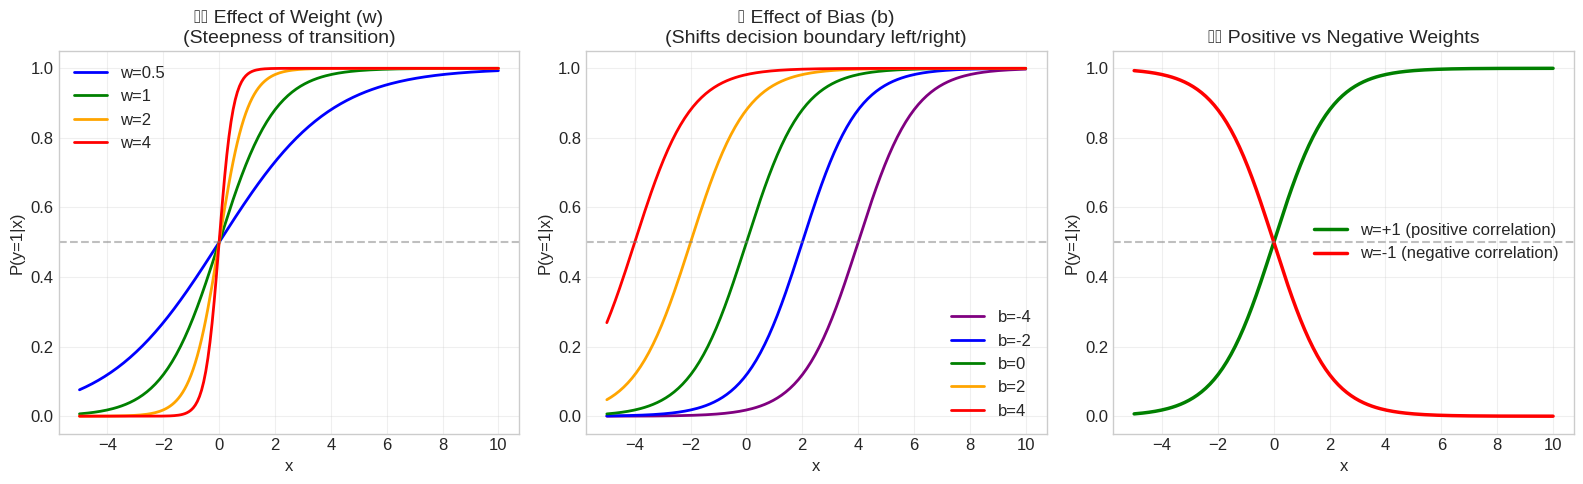


💡 KEY INSIGHTS:
   • WEIGHT (w) controls how STEEP the transition is
     - Larger |w| = sharper decision (more confident)
     - Smaller |w| = gradual transition (more uncertain)

   • BIAS (b) controls WHERE the decision boundary is
     - Negative b = shifts boundary RIGHT
     - Positive b = shifts boundary LEFT

   • SIGN of w controls the DIRECTION
     - Positive w = more x → more likely class 1
     - Negative w = more x → less likely class 1


In [5]:
# Let's see how different weights and biases affect the sigmoid!

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x_range = np.linspace(-5, 10, 200)

# Plot 1: Different weights (slopes)
weights = [0.5, 1, 2, 4]
colors = ['blue', 'green', 'orange', 'red']
b = 0
for w, color in zip(weights, colors):
    z = w * x_range + b
    axes[0].plot(x_range, sigmoid(z), color=color, linewidth=2, label=f'w={w}')

axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('P(y=1|x)', fontsize=12)
axes[0].set_title('🏔️ Effect of Weight (w)\n(Steepness of transition)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Different biases (shifts)
w = 1
biases = [-4, -2, 0, 2, 4]
colors = ['purple', 'blue', 'green', 'orange', 'red']
for bias, color in zip(biases, colors):
    z = w * x_range + bias
    axes[1].plot(x_range, sigmoid(z), color=color, linewidth=2, label=f'b={bias}')

axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('P(y=1|x)', fontsize=12)
axes[1].set_title('📍 Effect of Bias (b)\n(Shifts decision boundary left/right)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Positive vs Negative weights
axes[2].plot(x_range, sigmoid(1 * x_range), 'green', linewidth=2.5, label='w=+1 (positive correlation)')
axes[2].plot(x_range, sigmoid(-1 * x_range), 'red', linewidth=2.5, label='w=-1 (negative correlation)')
axes[2].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[2].set_xlabel('x', fontsize=12)
axes[2].set_ylabel('P(y=1|x)', fontsize=12)
axes[2].set_title('↗️ Positive vs Negative Weights', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_weight_bias_effects.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 KEY INSIGHTS:")
print("   • WEIGHT (w) controls how STEEP the transition is")
print("     - Larger |w| = sharper decision (more confident)")
print("     - Smaller |w| = gradual transition (more uncertain)")
print("\n   • BIAS (b) controls WHERE the decision boundary is")
print("     - Negative b = shifts boundary RIGHT")
print("     - Positive b = shifts boundary LEFT")
print("\n   • SIGN of w controls the DIRECTION")
print("     - Positive w = more x → more likely class 1")
print("     - Negative w = more x → less likely class 1")

---

# Part 5: Our First Dataset - Student Pass/Fail 📝

Let's create a relatable dataset and apply logistic regression!

In [6]:
# Create our dataset: Predicting exam pass/fail based on study hours
np.random.seed(42)
n_students = 100

# Generate study hours (0 to 10 hours)
study_hours = np.random.uniform(0, 10, n_students)

# Generate pass/fail based on a logistic relationship
# True relationship: P(pass) = sigmoid(1.5 * hours - 7)
true_w = 1.5
true_b = -7
prob_pass = sigmoid(true_w * study_hours + true_b)
passed = np.random.binomial(1, prob_pass)  # Random outcome based on probability

# Create a DataFrame
student_data = pd.DataFrame({
    'Study_Hours': np.round(study_hours, 1),
    'Passed': passed
})

print("📊 STUDENT EXAM DATASET")
print("=" * 40)
print(student_data.head(10).to_string(index=False))
print(f"\n... and {n_students - 10} more students")
print(f"\n📈 Summary:")
print(f"   • Total students: {n_students}")
print(f"   • Passed: {passed.sum()} ({100*passed.mean():.1f}%)")
print(f"   • Failed: {n_students - passed.sum()} ({100*(1-passed.mean()):.1f}%)")

📊 STUDENT EXAM DATASET
 Study_Hours  Passed
         3.7       0
         9.5       1
         7.3       1
         6.0       1
         1.6       0
         1.6       0
         0.6       0
         8.7       1
         6.0       1
         7.1       1

... and 90 more students

📈 Summary:
   • Total students: 100
   • Passed: 51 (51.0%)
   • Failed: 49 (49.0%)


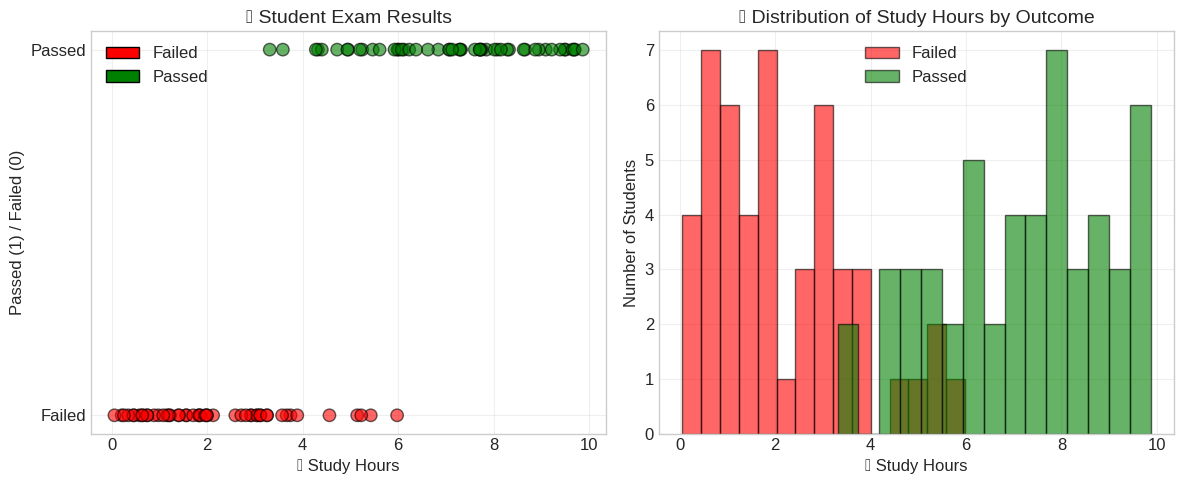


🔍 OBSERVATION:
   Students who FAILED studied on average 2.2 hours
   Students who PASSED studied on average 7.1 hours

   There's a clear pattern! More studying → Higher chance of passing!


In [7]:
# Visualize the data

plt.figure(figsize=(12, 5))

# Left plot: Scatter plot of our data
plt.subplot(1, 2, 1)
colors = ['red' if p == 0 else 'green' for p in passed]
plt.scatter(study_hours, passed, c=colors, s=80, alpha=0.6, edgecolors='black')
plt.xlabel('📚 Study Hours', fontsize=12)
plt.ylabel('Passed (1) / Failed (0)', fontsize=12)
plt.title('🎓 Student Exam Results', fontsize=14)
plt.yticks([0, 1], ['Failed', 'Passed'])
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='black', label='Failed'),
                   Patch(facecolor='green', edgecolor='black', label='Passed')]
plt.legend(handles=legend_elements)

# Right plot: Distribution by class
plt.subplot(1, 2, 2)
failed_hours = study_hours[passed == 0]
passed_hours = study_hours[passed == 1]

plt.hist(failed_hours, bins=15, alpha=0.6, color='red', label='Failed', edgecolor='black')
plt.hist(passed_hours, bins=15, alpha=0.6, color='green', label='Passed', edgecolor='black')
plt.xlabel('📚 Study Hours', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('📊 Distribution of Study Hours by Outcome', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('04_student_data_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔍 OBSERVATION:")
print(f"   Students who FAILED studied on average {failed_hours.mean():.1f} hours")
print(f"   Students who PASSED studied on average {passed_hours.mean():.1f} hours")
print("\n   There's a clear pattern! More studying → Higher chance of passing!")

---

# Part 6: The Cost Function - Cross-Entropy Loss 📉

## Why MSE Doesn't Work for Classification

In linear regression, we used Mean Squared Error (MSE). For classification, MSE creates a **non-convex** cost surface with many local minima - gradient descent can get stuck!

## The Cross-Entropy Loss (Log Loss)

For a single example:

$$L(y, \hat{y}) = -[y \cdot \log(\hat{y}) + (1-y) \cdot \log(1-\hat{y})]$$

For all examples (the total cost):

$$J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

Where:
- **y** = actual label (0 or 1)
- **ŷ** = predicted probability

## The Intuition

- If actual = 1 and we predict 0.99 → Low loss (good!)
- If actual = 1 and we predict 0.01 → High loss (bad!)
- If actual = 0 and we predict 0.01 → Low loss (good!)
- If actual = 0 and we predict 0.99 → High loss (bad!)

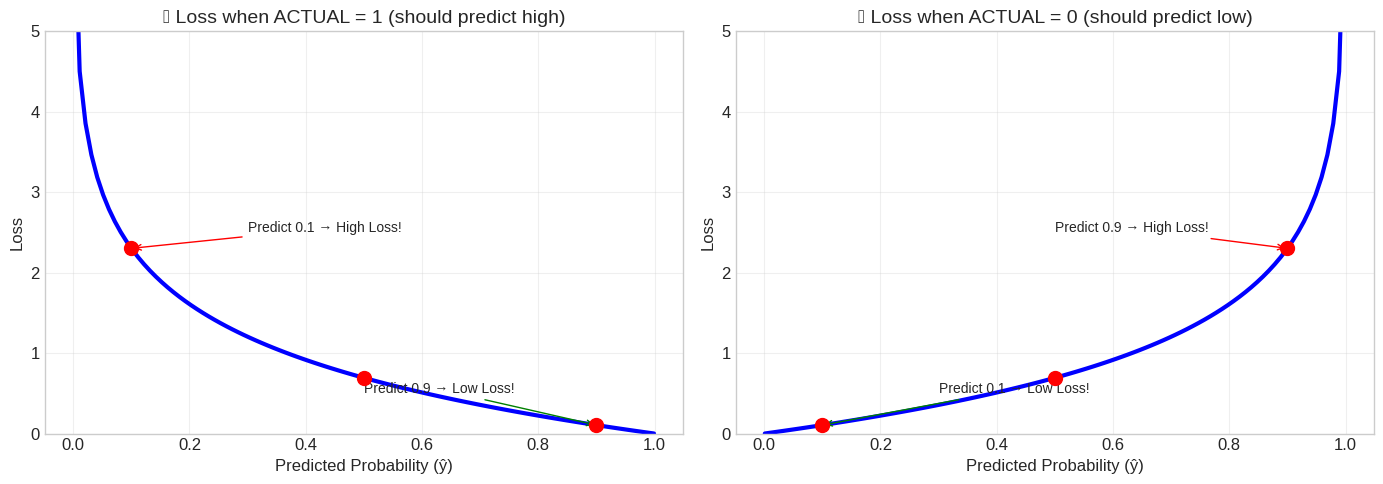


🔑 CROSS-ENTROPY LOSS INTUITION:
   • The loss PUNISHES confident wrong predictions SEVERELY
   • Predicting 0.9 when actual is 0 → HUGE loss
   • Predicting 0.5 is always 'safe' but not great
   • We want the model to be confident AND correct!


In [8]:
def cross_entropy_loss(y_true, y_pred):
    """
    Calculate Cross-Entropy Loss (Log Loss)

    This measures how "wrong" our probability predictions are.
    Lower loss = Better predictions!

    Parameters:
    -----------
    y_true : actual labels (0 or 1)
    y_pred : predicted probabilities (between 0 and 1)

    Returns:
    --------
    Average cross-entropy loss
    """
    # Clip predictions to avoid log(0) which is undefined
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate loss for each example
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Return average loss
    return np.mean(loss)


# Visualize how cross-entropy loss works
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

y_pred_range = np.linspace(0.001, 0.999, 100)

# Left plot: Loss when actual = 1
loss_when_y_is_1 = -np.log(y_pred_range)
axes[0].plot(y_pred_range, loss_when_y_is_1, 'b-', linewidth=3)
axes[0].scatter([0.1, 0.5, 0.9], [-np.log(0.1), -np.log(0.5), -np.log(0.9)],
               s=100, c='red', zorder=5)
axes[0].annotate('Predict 0.1 → High Loss!', xy=(0.1, -np.log(0.1)),
                 xytext=(0.3, 2.5), fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='red'))
axes[0].annotate('Predict 0.9 → Low Loss!', xy=(0.9, -np.log(0.9)),
                 xytext=(0.5, 0.5), fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='green'))
axes[0].set_xlabel('Predicted Probability (ŷ)', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('📈 Loss when ACTUAL = 1 (should predict high)', fontsize=14)
axes[0].set_ylim(0, 5)
axes[0].grid(True, alpha=0.3)

# Right plot: Loss when actual = 0
loss_when_y_is_0 = -np.log(1 - y_pred_range)
axes[1].plot(y_pred_range, loss_when_y_is_0, 'b-', linewidth=3)
axes[1].scatter([0.1, 0.5, 0.9], [-np.log(1-0.1), -np.log(1-0.5), -np.log(1-0.9)],
               s=100, c='red', zorder=5)
axes[1].annotate('Predict 0.9 → High Loss!', xy=(0.9, -np.log(0.1)),
                 xytext=(0.5, 2.5), fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='red'))
axes[1].annotate('Predict 0.1 → Low Loss!', xy=(0.1, -np.log(0.9)),
                 xytext=(0.3, 0.5), fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='green'))
axes[1].set_xlabel('Predicted Probability (ŷ)', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('📉 Loss when ACTUAL = 0 (should predict low)', fontsize=14)
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('05_cross_entropy_loss.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔑 CROSS-ENTROPY LOSS INTUITION:")
print("   • The loss PUNISHES confident wrong predictions SEVERELY")
print("   • Predicting 0.9 when actual is 0 → HUGE loss")
print("   • Predicting 0.5 is always 'safe' but not great")
print("   • We want the model to be confident AND correct!")

---

# Part 7: Gradient Descent for Logistic Regression 🧗

Just like in linear regression, we use gradient descent to find the best weights!

## The Gradients

$$\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_i$$

$$\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)$$

These look almost identical to linear regression! The magic is that **ŷ = sigmoid(wx + b)** instead of just wx + b.

In [9]:
def logistic_regression_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, verbose=True):
    """
    Train a Logistic Regression model using Gradient Descent!

    Parameters:
    -----------
    X : input features
    y : actual labels (0 or 1)
    learning_rate : step size for gradient descent
    n_iterations : number of training iterations
    verbose : whether to print progress

    Returns:
    --------
    w, b : learned weight and bias
    history : record of training progress
    """
    n = len(X)

    # Initialize weights to zero
    w = 0
    b = 0

    # Track history
    history = {'w': [w], 'b': [b], 'loss': [], 'accuracy': []}

    # Initial predictions and loss
    z = w * X + b
    y_pred = sigmoid(z)
    initial_loss = cross_entropy_loss(y, y_pred)
    initial_acc = np.mean((y_pred >= 0.5) == y)
    history['loss'].append(initial_loss)
    history['accuracy'].append(initial_acc)

    if verbose:
        print("🚀 Starting Logistic Regression Training!")
        print(f"   Initial: w={w:.4f}, b={b:.4f}, Loss={initial_loss:.4f}, Accuracy={initial_acc:.2%}")
        print("\n   Training...")

    for iteration in range(n_iterations):
        # Step 1: Make predictions
        z = w * X + b
        y_pred = sigmoid(z)

        # Step 2: Calculate gradients
        errors = y_pred - y
        gradient_w = (1/n) * np.sum(errors * X)
        gradient_b = (1/n) * np.sum(errors)

        # Step 3: Update weights
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        # Calculate loss and accuracy
        z = w * X + b
        y_pred = sigmoid(z)
        loss = cross_entropy_loss(y, y_pred)
        accuracy = np.mean((y_pred >= 0.5) == y)

        # Save history
        history['w'].append(w)
        history['b'].append(b)
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)

        # Print progress
        if verbose and (iteration + 1) in [1, 10, 50, 100, 500, n_iterations]:
            print(f"   Iteration {iteration+1:>4}: w={w:.4f}, b={b:.4f}, Loss={loss:.4f}, Acc={accuracy:.2%}")

    if verbose:
        print(f"\n✅ Training Complete!")
        print(f"   Final: w={w:.4f}, b={b:.4f}")
        print(f"   True values: w={true_w}, b={true_b}")

    return w, b, history


# Train our model!
learned_w, learned_b, history = logistic_regression_gradient_descent(
    study_hours, passed,
    learning_rate=0.5,
    n_iterations=1000
)

🚀 Starting Logistic Regression Training!
   Initial: w=0.0000, b=0.0000, Loss=0.6931, Accuracy=51.00%

   Training...
   Iteration    1: w=0.6414, b=0.0050, Loss=0.8365, Acc=51.00%
   Iteration   10: w=0.2710, b=-0.8153, Loss=0.4529, Acc=85.00%
   Iteration   50: w=0.6562, b=-2.5590, Loss=0.2779, Acc=93.00%
   Iteration  100: w=0.8624, b=-3.6021, Loss=0.2316, Acc=93.00%
   Iteration  500: w=1.3554, b=-6.0063, Loss=0.1926, Acc=90.00%
   Iteration 1000: w=1.5000, b=-6.6985, Loss=0.1904, Acc=90.00%

✅ Training Complete!
   Final: w=1.5000, b=-6.6985
   True values: w=1.5, b=-7


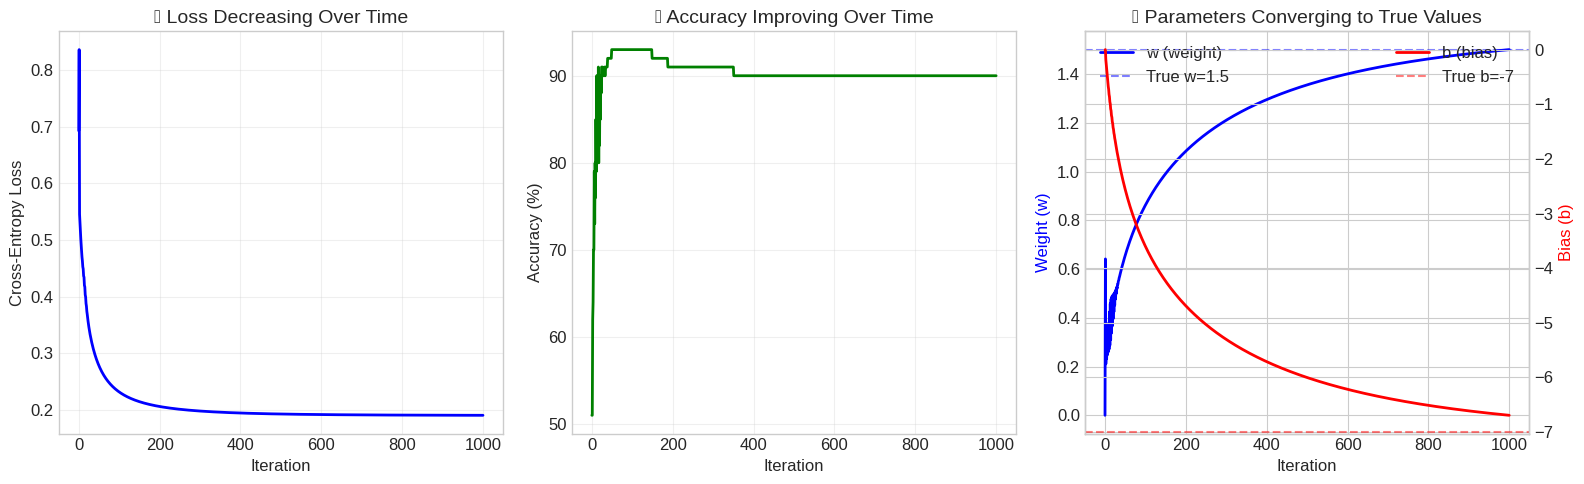

In [10]:
# Visualize the training progress

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Loss over iterations
axes[0].plot(history['loss'], 'b-', linewidth=2)
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cross-Entropy Loss', fontsize=12)
axes[0].set_title('📉 Loss Decreasing Over Time', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Plot 2: Accuracy over iterations
axes[1].plot([a * 100 for a in history['accuracy']], 'g-', linewidth=2)
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('📈 Accuracy Improving Over Time', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Plot 3: Weight and bias convergence
ax3_twin = axes[2].twinx()
axes[2].plot(history['w'], 'b-', linewidth=2, label='w (weight)')
ax3_twin.plot(history['b'], 'r-', linewidth=2, label='b (bias)')
axes[2].axhline(y=true_w, color='blue', linestyle='--', alpha=0.5, label=f'True w={true_w}')
ax3_twin.axhline(y=true_b, color='red', linestyle='--', alpha=0.5, label=f'True b={true_b}')
axes[2].set_xlabel('Iteration', fontsize=12)
axes[2].set_ylabel('Weight (w)', fontsize=12, color='blue')
ax3_twin.set_ylabel('Bias (b)', fontsize=12, color='red')
axes[2].set_title('🎯 Parameters Converging to True Values', fontsize=14)
axes[2].legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('06_training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

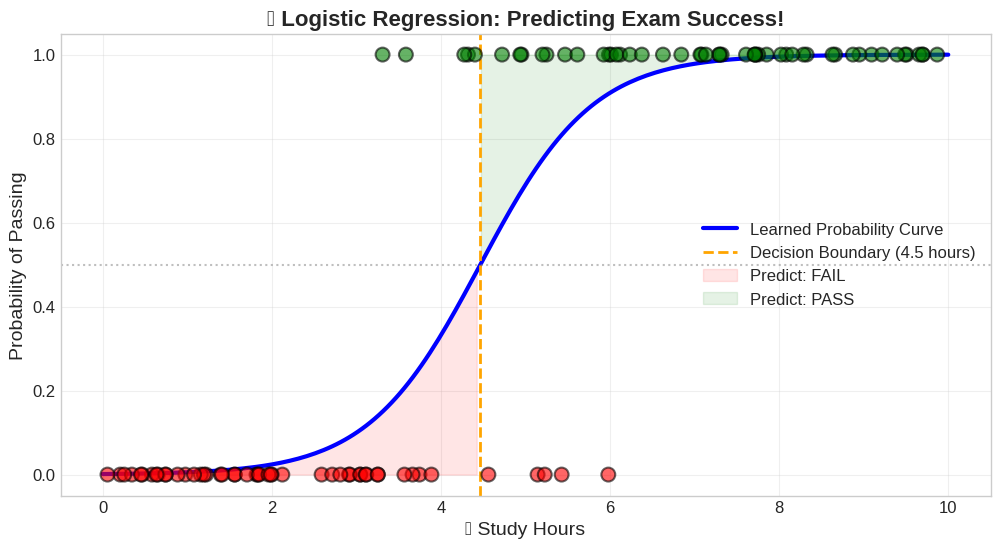


🎯 MODEL INTERPRETATION:
   Decision Boundary: 4.47 hours
   • Study < 4.5 hours → Model predicts FAIL
   • Study ≥ 4.5 hours → Model predicts PASS

   Each additional hour of studying increases your log-odds of passing by 1.50!


In [11]:
# Visualize our learned model!

plt.figure(figsize=(12, 6))

# Plot data points
colors = ['red' if p == 0 else 'green' for p in passed]
plt.scatter(study_hours, passed, c=colors, s=100, alpha=0.6,
            edgecolors='black', linewidth=1.5, zorder=5)

# Plot the sigmoid curve
x_line = np.linspace(0, 10, 200)
y_prob = sigmoid(learned_w * x_line + learned_b)
plt.plot(x_line, y_prob, 'b-', linewidth=3, label='Learned Probability Curve')

# Plot decision boundary
decision_boundary = -learned_b / learned_w
plt.axvline(x=decision_boundary, color='orange', linestyle='--', linewidth=2,
            label=f'Decision Boundary ({decision_boundary:.1f} hours)')
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

# Fill regions
plt.fill_between(x_line, 0, y_prob, where=(x_line < decision_boundary),
                 color='red', alpha=0.1, label='Predict: FAIL')
plt.fill_between(x_line, y_prob, 1, where=(x_line >= decision_boundary),
                 color='green', alpha=0.1, label='Predict: PASS')

plt.xlabel('📚 Study Hours', fontsize=14)
plt.ylabel('Probability of Passing', fontsize=14)
plt.title('🎓 Logistic Regression: Predicting Exam Success!', fontsize=16, fontweight='bold')
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)
plt.ylim(-0.05, 1.05)

plt.savefig('07_logistic_regression_result.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n🎯 MODEL INTERPRETATION:")
print(f"   Decision Boundary: {decision_boundary:.2f} hours")
print(f"   • Study < {decision_boundary:.1f} hours → Model predicts FAIL")
print(f"   • Study ≥ {decision_boundary:.1f} hours → Model predicts PASS")
print(f"\n   Each additional hour of studying increases your log-odds of passing by {learned_w:.2f}!")

---

# Part 8: Decision Boundaries in 2D 🗺️

Real problems often have **multiple features**! Let's see how logistic regression creates decision boundaries in 2D.

In [12]:
# Create a 2D dataset: Exam results based on study hours AND sleep hours
np.random.seed(42)
n_samples = 200

# Generate data for two classes
# Class 0 (Fail): Lower study, varied sleep
# Class 1 (Pass): Higher study, varied sleep

# Passed students (class 1)
n_passed = n_samples // 2
passed_study = np.random.normal(6, 1.5, n_passed)
passed_sleep = np.random.normal(7, 1, n_passed)

# Failed students (class 0)
n_failed = n_samples // 2
failed_study = np.random.normal(3, 1.5, n_failed)
failed_sleep = np.random.normal(7, 1, n_failed)

# Combine the data
X_2d = np.vstack([
    np.column_stack([passed_study, passed_sleep]),
    np.column_stack([failed_study, failed_sleep])
])
y_2d = np.array([1] * n_passed + [0] * n_failed)

# Shuffle the data
shuffle_idx = np.random.permutation(n_samples)
X_2d = X_2d[shuffle_idx]
y_2d = y_2d[shuffle_idx]

print("📊 2D DATASET: Study Hours AND Sleep Hours")
print(f"   Total samples: {n_samples}")
print(f"   Features: Study Hours, Sleep Hours")
print(f"   Classes: Pass (1) / Fail (0)")

📊 2D DATASET: Study Hours AND Sleep Hours
   Total samples: 200
   Features: Study Hours, Sleep Hours
   Classes: Pass (1) / Fail (0)


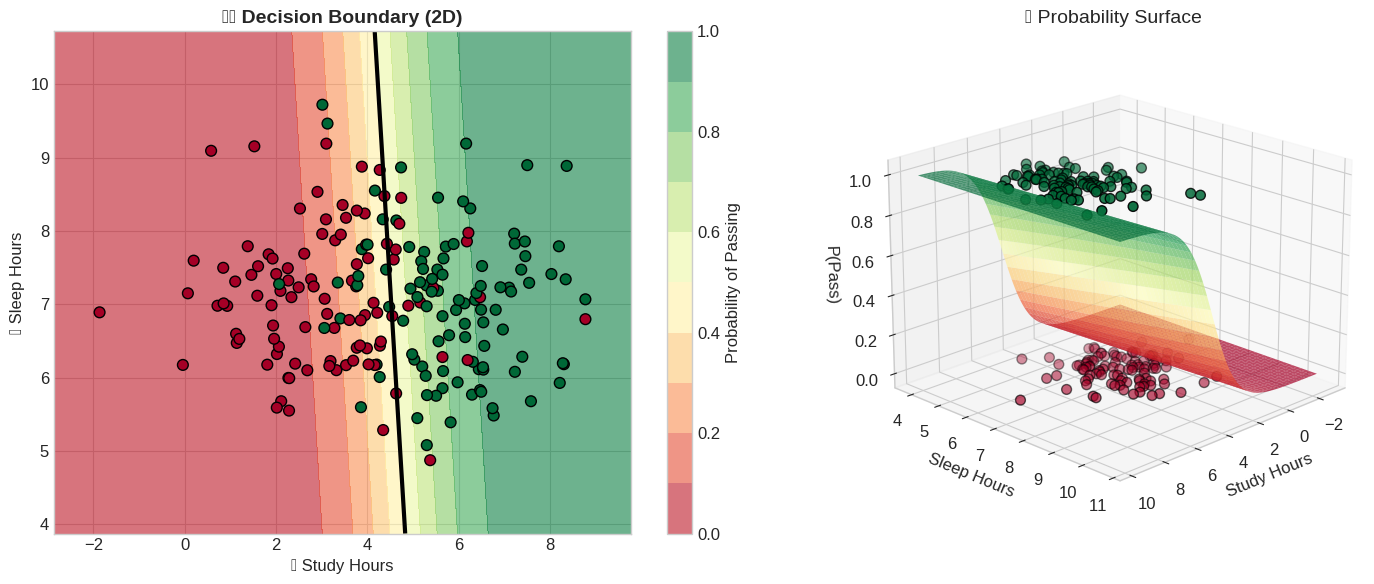


🔢 MODEL COEFFICIENTS:
   w1 (Study Hours): 1.2098
   w2 (Sleep Hours): 0.1180
   b (Bias): -6.3028

   The BLACK LINE is the Decision Boundary!
   Points on one side → Predict PASS
   Points on other side → Predict FAIL


In [13]:
# Train logistic regression and visualize the decision boundary
from sklearn.linear_model import LogisticRegression

# Train the model
model_2d = LogisticRegression()
model_2d.fit(X_2d, y_2d)

# Create a mesh grid for visualization
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on the mesh grid
Z = model_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Create the visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Decision boundary with probability contours
contour = axes[0].contourf(xx, yy, Z, levels=np.linspace(0, 1, 11),
                           cmap='RdYlGn', alpha=0.6)
axes[0].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)

# Plot data points
scatter = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap='RdYlGn',
                          s=60, edgecolors='black', linewidth=1)

axes[0].set_xlabel('📚 Study Hours', fontsize=12)
axes[0].set_ylabel('😴 Sleep Hours', fontsize=12)
axes[0].set_title('🗺️ Decision Boundary (2D)', fontsize=14, fontweight='bold')
plt.colorbar(contour, ax=axes[0], label='Probability of Passing')

# Right plot: 3D probability surface
ax3d = fig.add_subplot(122, projection='3d')
surf = ax3d.plot_surface(xx, yy, Z, cmap='RdYlGn', alpha=0.7, linewidth=0)
ax3d.scatter(X_2d[:, 0], X_2d[:, 1], y_2d, c=y_2d, cmap='RdYlGn',
             s=50, edgecolors='black')
ax3d.set_xlabel('Study Hours')
ax3d.set_ylabel('Sleep Hours')
ax3d.set_zlabel('P(Pass)')
ax3d.set_title('📈 Probability Surface', fontsize=14)
ax3d.view_init(elev=20, azim=45)

# Remove the empty subplot we created earlier
axes[1].remove()

plt.tight_layout()
plt.savefig('08_2d_decision_boundary.png', dpi=150, bbox_inches='tight')
plt.show()

# Print model coefficients
print(f"\n🔢 MODEL COEFFICIENTS:")
print(f"   w1 (Study Hours): {model_2d.coef_[0][0]:.4f}")
print(f"   w2 (Sleep Hours): {model_2d.coef_[0][1]:.4f}")
print(f"   b (Bias): {model_2d.intercept_[0]:.4f}")
print(f"\n   The BLACK LINE is the Decision Boundary!")
print(f"   Points on one side → Predict PASS")
print(f"   Points on other side → Predict FAIL")

---

# Part 9: Multi-Class Classification 🎨

What if we have **more than 2 classes**? For example:
- Predicting if a flower is **Setosa**, **Versicolor**, or **Virginica**
- Classifying an image as a **cat**, **dog**, or **bird**

## Two Main Approaches

### 1. One-vs-Rest (OvR)
Train separate classifiers for each class:
- Classifier 1: Setosa vs (not Setosa)
- Classifier 2: Versicolor vs (not Versicolor)
- Classifier 3: Virginica vs (not Virginica)

### 2. Softmax Regression (Multinomial)
Directly compute probabilities for all classes at once!

In [14]:
# Let's use the famous Iris dataset!
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X_iris = iris.data[:, :2]  # Just use first 2 features for visualization
y_iris = iris.target
feature_names = iris.feature_names[:2]
class_names = iris.target_names

print("🌸 IRIS DATASET")
print("=" * 40)
print(f"   Features: {feature_names}")
print(f"   Classes: {list(class_names)}")
print(f"   Total samples: {len(X_iris)}")
print(f"   Samples per class: {np.bincount(y_iris)}")

🌸 IRIS DATASET
   Features: ['sepal length (cm)', 'sepal width (cm)']
   Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
   Total samples: 150
   Samples per class: [50 50 50]


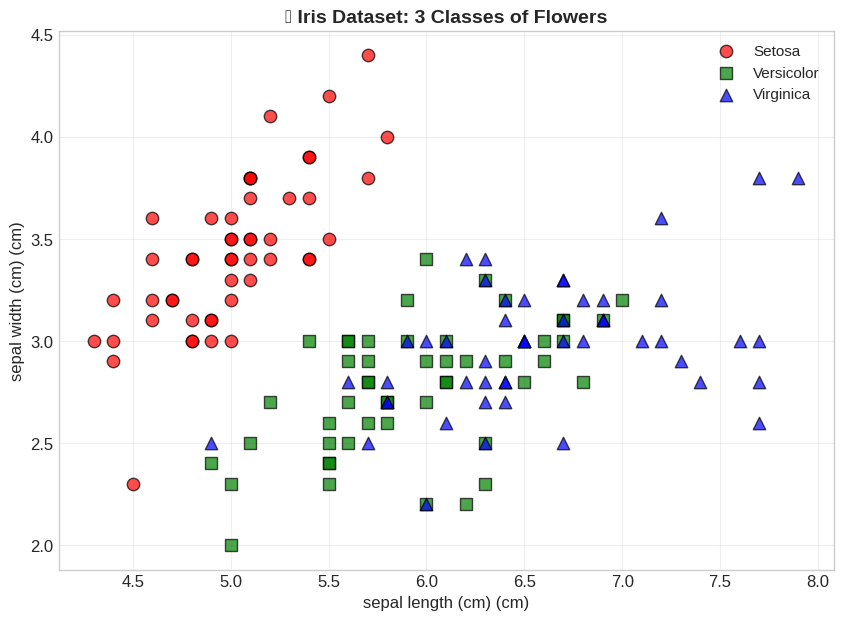

In [15]:
# Visualize the Iris data

plt.figure(figsize=(10, 7))

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i, (class_name, color, marker) in enumerate(zip(class_names, colors, markers)):
    mask = y_iris == i
    plt.scatter(X_iris[mask, 0], X_iris[mask, 1],
                c=color, marker=marker, s=80, alpha=0.7,
                edgecolors='black', linewidth=1, label=class_name.capitalize())

plt.xlabel(f'{feature_names[0]} (cm)', fontsize=12)
plt.ylabel(f'{feature_names[1]} (cm)', fontsize=12)
plt.title('🌸 Iris Dataset: 3 Classes of Flowers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.savefig('09_iris_data.png', dpi=150, bbox_inches='tight')
plt.show()

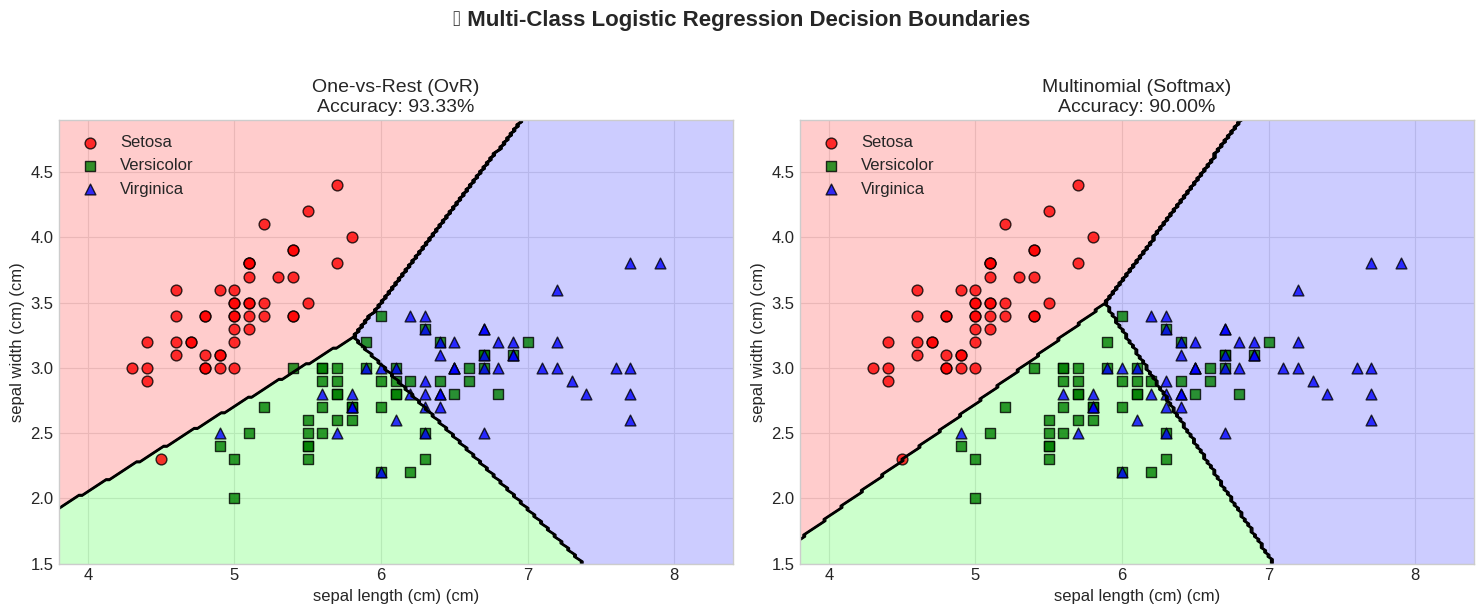


📊 COMPARISON:
   One-vs-Rest Accuracy: 93.33%
   Multinomial Accuracy: 90.00%


In [16]:
# Train multi-class logistic regression and visualize decision boundaries

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42)

# Train models with both approaches
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_multinomial = LogisticRegression(multi_class='multinomial', max_iter=1000)

model_ovr.fit(X_train, y_train)
model_multinomial.fit(X_train, y_train)

# Create mesh for visualization
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Visualize both approaches
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for ax, model, title in [(axes[0], model_ovr, 'One-vs-Rest (OvR)'),
                          (axes[1], model_multinomial, 'Multinomial (Softmax)')]:
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    ax.contour(xx, yy, Z, colors='black', linewidths=1)

    # Plot data points
    for i, (class_name, color, marker) in enumerate(zip(class_names, colors, markers)):
        mask = y_iris == i
        ax.scatter(X_iris[mask, 0], X_iris[mask, 1],
                   c=color, marker=marker, s=60, alpha=0.8,
                   edgecolors='black', linewidth=1, label=class_name.capitalize())

    ax.set_xlabel(f'{feature_names[0]} (cm)', fontsize=12)
    ax.set_ylabel(f'{feature_names[1]} (cm)', fontsize=12)
    ax.set_title(f'{title}\nAccuracy: {model.score(X_test, y_test):.2%}', fontsize=14)
    ax.legend(loc='upper left')

plt.suptitle('🌸 Multi-Class Logistic Regression Decision Boundaries',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('10_multiclass_decision_boundaries.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 COMPARISON:")
print(f"   One-vs-Rest Accuracy: {model_ovr.score(X_test, y_test):.2%}")
print(f"   Multinomial Accuracy: {model_multinomial.score(X_test, y_test):.2%}")

---

# Part 10: Evaluation Metrics - How Good is Our Model? 📊

**Accuracy** isn't always enough! Let's learn about different ways to evaluate classification models.

## The Confusion Matrix

A table showing:
- **True Positives (TP)**: Correctly predicted positive
- **True Negatives (TN)**: Correctly predicted negative  
- **False Positives (FP)**: Wrongly predicted positive (Type I Error)
- **False Negatives (FN)**: Wrongly predicted negative (Type II Error)

## Key Metrics

- **Accuracy** = (TP + TN) / Total
- **Precision** = TP / (TP + FP) - "Of all positive predictions, how many were correct?"
- **Recall** = TP / (TP + FN) - "Of all actual positives, how many did we find?"
- **F1 Score** = 2 × (Precision × Recall) / (Precision + Recall)

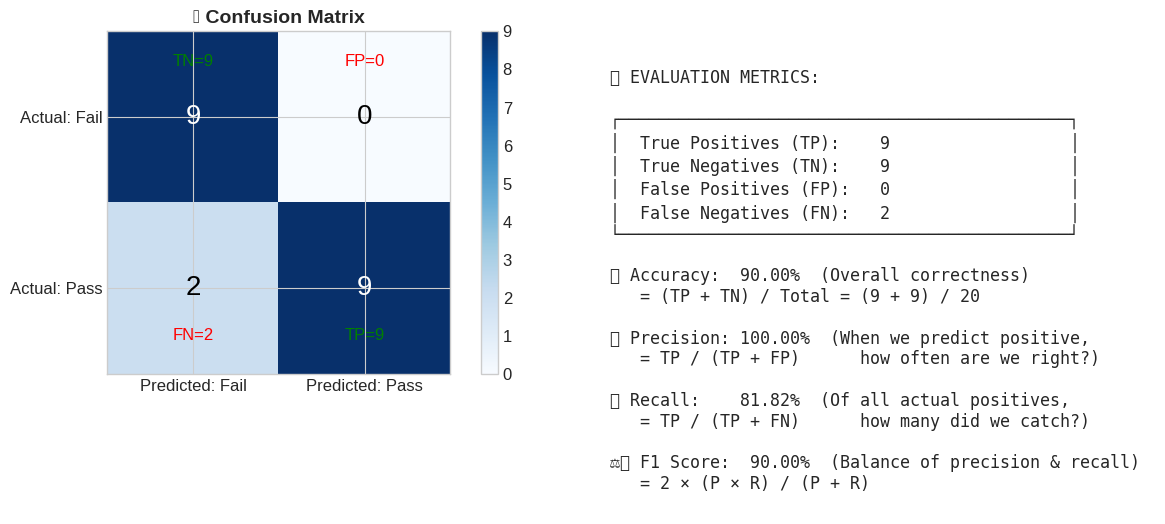

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a binary classification example
# Let's use our student pass/fail data
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(
    study_hours.reshape(-1, 1), passed, test_size=0.2, random_state=42)

# Train model
model_eval = LogisticRegression()
model_eval.fit(X_train_st, y_train_st)

# Make predictions
y_pred_st = model_eval.predict(X_test_st)
y_prob_st = model_eval.predict_proba(X_test_st)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test_st, y_pred_st)

# Visualize the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Confusion Matrix Heatmap
im = axes[0].imshow(cm, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Predicted: Fail', 'Predicted: Pass'])
axes[0].set_yticklabels(['Actual: Fail', 'Actual: Pass'])

# Add numbers to the matrix
for i in range(2):
    for j in range(2):
        text = axes[0].text(j, i, cm[i, j], ha='center', va='center',
                           fontsize=20, color='white' if cm[i, j] > cm.max()/2 else 'black')

# Add labels
axes[0].text(0, -0.3, f'TN={cm[0,0]}', ha='center', fontsize=12, color='green')
axes[0].text(1, -0.3, f'FP={cm[0,1]}', ha='center', fontsize=12, color='red')
axes[0].text(0, 1.3, f'FN={cm[1,0]}', ha='center', fontsize=12, color='red')
axes[0].text(1, 1.3, f'TP={cm[1,1]}', ha='center', fontsize=12, color='green')

axes[0].set_title('📊 Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=axes[0])

# Right: Metrics explanation
axes[1].axis('off')
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

metrics_text = f"""
📈 EVALUATION METRICS:

┌─────────────────────────────────────────────┐
│  True Positives (TP):  {tp:>3}                  │
│  True Negatives (TN):  {tn:>3}                  │
│  False Positives (FP): {fp:>3}                  │
│  False Negatives (FN): {fn:>3}                  │
└─────────────────────────────────────────────┘

✅ Accuracy:  {accuracy:.2%}  (Overall correctness)
   = (TP + TN) / Total = ({tp} + {tn}) / {tp+tn+fp+fn}

🎯 Precision: {precision:.2%}  (When we predict positive,
   = TP / (TP + FP)      how often are we right?)

🔍 Recall:    {recall:.2%}  (Of all actual positives,
   = TP / (TP + FN)      how many did we catch?)

⚖️ F1 Score:  {f1:.2%}  (Balance of precision & recall)
   = 2 × (P × R) / (P + R)
"""
axes[1].text(0.1, 0.95, metrics_text, fontsize=12, verticalalignment='top',
             fontfamily='monospace', transform=axes[1].transAxes)

plt.tight_layout()
plt.savefig('11_evaluation_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

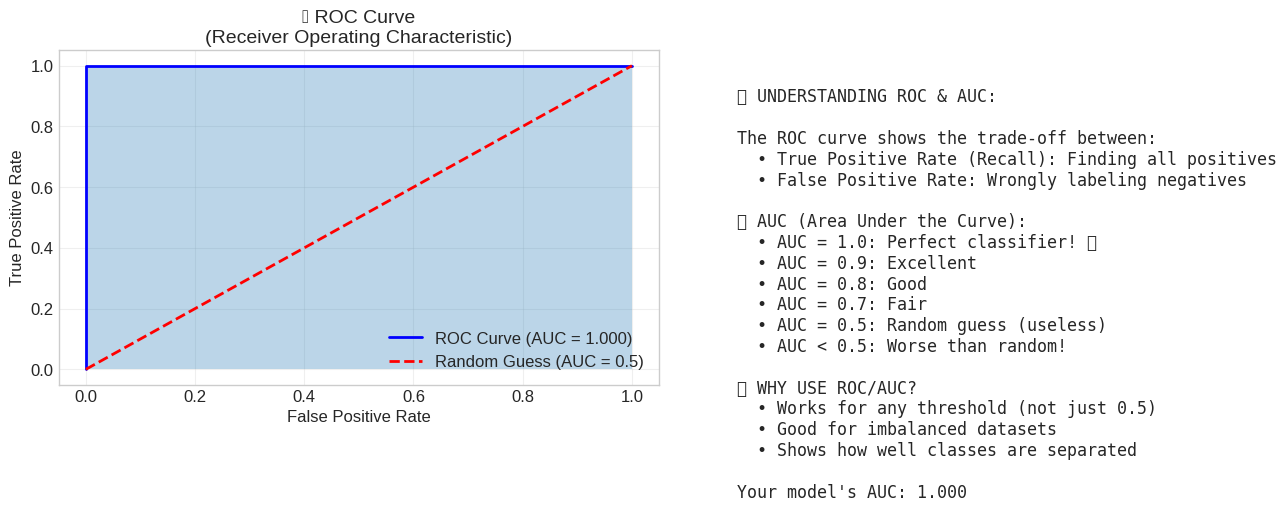

In [18]:
# ROC Curve and AUC - Another important evaluation tool!
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_st, y_prob_st)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: ROC Curve
axes[0].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Guess (AUC = 0.5)')
axes[0].fill_between(fpr, tpr, alpha=0.3)
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('📈 ROC Curve\n(Receiver Operating Characteristic)', fontsize=14)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Right: Explanation
axes[1].axis('off')
roc_text = """
🎯 UNDERSTANDING ROC & AUC:

The ROC curve shows the trade-off between:
  • True Positive Rate (Recall): Finding all positives
  • False Positive Rate: Wrongly labeling negatives

📊 AUC (Area Under the Curve):
  • AUC = 1.0: Perfect classifier! 🌟
  • AUC = 0.9: Excellent
  • AUC = 0.8: Good
  • AUC = 0.7: Fair
  • AUC = 0.5: Random guess (useless)
  • AUC < 0.5: Worse than random!

💡 WHY USE ROC/AUC?
  • Works for any threshold (not just 0.5)
  • Good for imbalanced datasets
  • Shows how well classes are separated

Your model's AUC: {:.3f}
""".format(roc_auc)
axes[1].text(0.1, 0.95, roc_text, fontsize=12, verticalalignment='top',
             fontfamily='monospace', transform=axes[1].transAxes)

plt.tight_layout()
plt.savefig('12_roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()

---

# Part 11: Regularization in Logistic Regression 🎛️

Just like in linear regression, we can add regularization to prevent overfitting!

**L2 Regularization (Ridge)**:
$$J(w) = -\frac{1}{n} \sum [y \log(\hat{y}) + (1-y) \log(1-\hat{y})] + \frac{\lambda}{2} \sum w^2$$

**L1 Regularization (Lasso)**:
$$J(w) = -\frac{1}{n} \sum [y \log(\hat{y}) + (1-y) \log(1-\hat{y})] + \lambda \sum |w|$$

In sklearn, the parameter **C** controls regularization:
- **C = 1/λ** (inverse of regularization strength)
- **Smaller C** = Stronger regularization
- **Larger C** = Weaker regularization

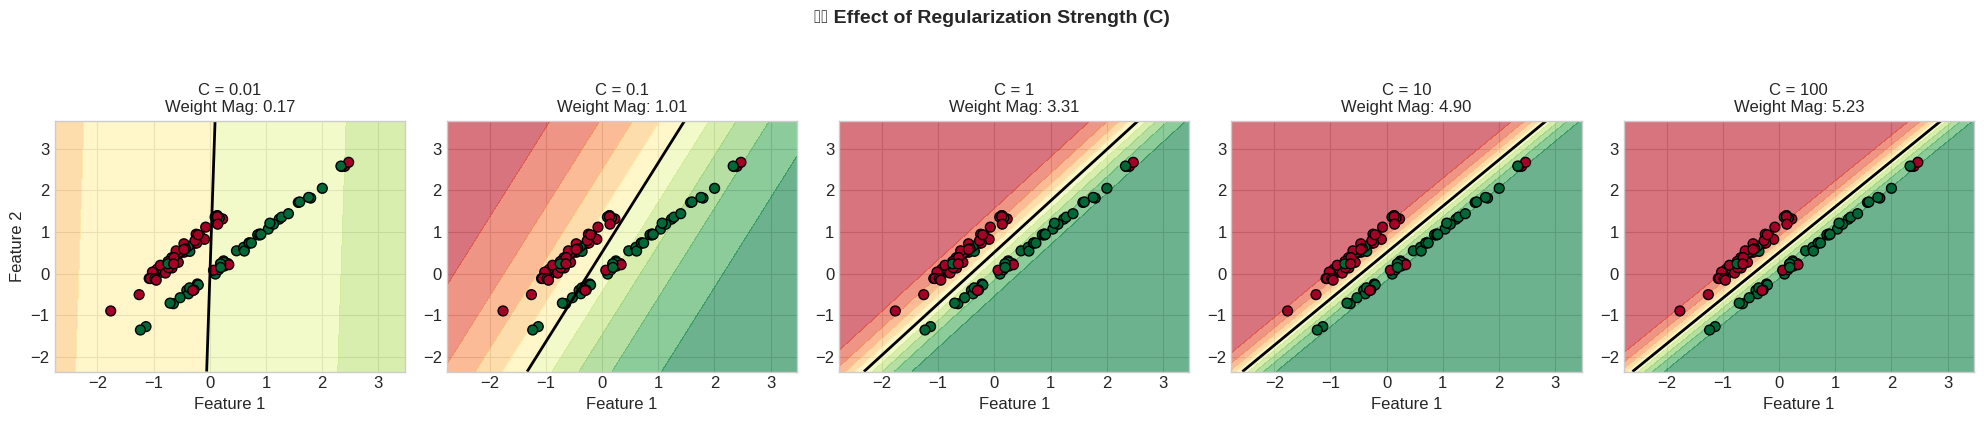


💡 OBSERVATIONS:
   • Small C (0.01): Strong regularization → Simple boundary, smaller weights
   • Large C (100): Weak regularization → More complex boundary, larger weights
   • Sweet spot is usually somewhere in the middle!


In [19]:
# Demonstrate the effect of regularization strength

# Create a more complex dataset for this demo
np.random.seed(42)
from sklearn.datasets import make_classification

X_reg, y_reg = make_classification(n_samples=100, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1,
                                   flip_y=0.1, class_sep=0.5, random_state=42)

# Test different C values
C_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Create mesh
x_min, x_max = X_reg[:, 0].min() - 1, X_reg[:, 0].max() + 1
y_min, y_max = X_reg[:, 1].min() - 1, X_reg[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

for ax, C in zip(axes, C_values):
    # Train model
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_reg, y_reg)

    # Predict on mesh
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap='RdYlGn', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    ax.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='RdYlGn',
               s=50, edgecolors='black')

    # Calculate weight magnitude
    weight_mag = np.sqrt(np.sum(model.coef_**2))

    ax.set_title(f'C = {C}\nWeight Mag: {weight_mag:.2f}', fontsize=12)
    ax.set_xlabel('Feature 1')
    if C == 0.01:
        ax.set_ylabel('Feature 2')

plt.suptitle('🎛️ Effect of Regularization Strength (C)', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('13_regularization_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 OBSERVATIONS:")
print("   • Small C (0.01): Strong regularization → Simple boundary, smaller weights")
print("   • Large C (100): Weak regularization → More complex boundary, larger weights")
print("   • Sweet spot is usually somewhere in the middle!")

---

# 🎓 Summary: What You Learned!

## Key Concepts

### 1. **Classification vs Regression**
- Classification predicts **categories** (yes/no, classes)
- Regression predicts **continuous numbers**

### 2. **The Sigmoid Function**
- Converts any number to a probability (0 to 1)
- Creates the S-shaped curve: $\sigma(z) = \frac{1}{1 + e^{-z}}$

### 3. **Logistic Regression Model**
- $P(y=1|x) = \sigma(wx + b)$
- Outputs probabilities, not just 0/1

### 4. **Cross-Entropy Loss**
- Measures how wrong probability predictions are
- Severely punishes confident wrong predictions

### 5. **Decision Boundaries**
- The line/surface that separates classes
- Where probability = 0.5

### 6. **Evaluation Metrics**
- Accuracy, Precision, Recall, F1 Score
- Confusion Matrix, ROC Curve, AUC

---

**Congratulations! You now understand Logistic Regression! 🎉**

In [20]:
# Quick Reference Card

print("""
╔══════════════════════════════════════════════════════════════════════╗
║                📚 LOGISTIC REGRESSION CHEAT SHEET                    ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  SIGMOID FUNCTION:  σ(z) = 1 / (1 + e^(-z))                          ║
║                                                                      ║
║  MODEL:  P(y=1|x) = σ(w·x + b)                                       ║
║                                                                      ║
║  DECISION RULE:                                                      ║
║     If P(y=1) ≥ 0.5 → Predict Class 1                                ║
║     If P(y=1) < 0.5 → Predict Class 0                                ║
║                                                                      ║
║  CROSS-ENTROPY LOSS:                                                 ║
║     L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]                                 ║
║                                                                      ║
║  GRADIENT DESCENT:                                                   ║
║     w = w - α · (1/n) Σ (ŷ - y) · x                                  ║
║     b = b - α · (1/n) Σ (ŷ - y)                                      ║
║                                                                      ║
║  KEY METRICS:                                                        ║
║     Accuracy  = (TP + TN) / Total                                    ║
║     Precision = TP / (TP + FP)                                       ║
║     Recall    = TP / (TP + FN)                                       ║
║     F1 Score  = 2 × (P × R) / (P + R)                                ║
║                                                                      ║
║  REGULARIZATION:                                                     ║
║     C parameter: Smaller = Stronger regularization                   ║
║     L2 (Ridge): Shrinks all weights                                  ║
║     L1 (Lasso): Can eliminate features                               ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════╗
║                📚 LOGISTIC REGRESSION CHEAT SHEET                    ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  SIGMOID FUNCTION:  σ(z) = 1 / (1 + e^(-z))                          ║
║                                                                      ║
║  MODEL:  P(y=1|x) = σ(w·x + b)                                       ║
║                                                                      ║
║  DECISION RULE:                                                      ║
║     If P(y=1) ≥ 0.5 → Predict Class 1                                ║
║     If P(y=1) < 0.5 → Predict Class 0                                ║
║                                                                      ║
║  CROSS-ENTROPY LOSS:                                                 ║
║     L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]             